In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load data

In [56]:
df = pd.read_csv(r'D:\Layoff2022US\dataset\tech_layoffs.csv')
df.head()

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes
0,C2FO,20,2,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,NaN
1,VideoAmp,Unclear,2,9/19/2022,Advertising platforms,Los Angeles,Company memo,Private,NaN
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private,NaN
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private,NaN
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private,"Per Axios, 22 of the employees laid off were f..."


## checking null values("Unclear") in total_layoffs column

In [57]:
tot_unclear= df['total_layoffs']=="Unclear"
tot_unclear_count= pd.value_counts(tot_unclear)
print(tot_unclear_count)

False    307
True     182
Name: total_layoffs, dtype: int64


## checking null values in impacted_workforce_percentage column

In [58]:
per_unclear= df['impacted_workforce_percentage']=="Unclear"
per_unclear_count= pd.value_counts(per_unclear)
print(per_unclear_count)

False    356
True     133
Name: impacted_workforce_percentage, dtype: int64


## Dropping null from total_layoffs

In [59]:
clean=df[df['total_layoffs']!="Unclear"]
clean['total_layoffs']=clean['total_layoffs'].astype(int)
clean

C:\Users\Eslam\AppData\Local\Temp\ipykernel_14184\704381366.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean['total_layoffs']=clean['total_layoffs'].astype(int)


,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes
0,C2FO,20,2,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,NaN
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private,NaN
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private,NaN
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private,"Per Axios, 22 of the employees laid off were f..."
6,Armis Security,25,4,12/8/2022,Cybersecurity,San Francisco,Calcalistech,Private,NaN
...,...,...,...,...,...,...,...,...,...
480,HashiCorp,69,Unclear,1/11/2023,"cybersecurity, cloud infrastructure",San Francisco,Crunchbase News Reporting,Public,NaN
481,Quanergy Systems,72,Unclear,12/14/2022,Autonomous vehicles,"Sunnyvale, CA",Silicon Valley Business Journal,Public,NaN
482,Doma,825,Unclear,12/6/2022,"Insurtech, machine learning",San Francsico,Doma,Public,The company previously laid off workers in May.
483,Wayfair,870,Unclear,8/19/2022,"E-commerce, retail",Boston,Boston Globe,Public,NaN


In [60]:
clean['industry0']=clean['industry'].str.split(pat=",")
clean

C:\Users\Eslam\AppData\Local\Temp\ipykernel_14184\365241406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean['industry0']=clean['industry'].str.split(pat=",")


,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes,industry0
0,C2FO,20,2,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,NaN,"[Fintech, payments]"
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private,NaN,"[Saas, analytics]"
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private,NaN,"[fintech, data analytics]"
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private,"Per Axios, 22 of the employees laid off were f...",[Health Care]
6,Armis Security,25,4,12/8/2022,Cybersecurity,San Francisco,Calcalistech,Private,NaN,[Cybersecurity]
...,...,...,...,...,...,...,...,...,...,...
480,HashiCorp,69,Unclear,1/11/2023,"cybersecurity, cloud infrastructure",San Francisco,Crunchbase News Reporting,Public,NaN,"[cybersecurity, cloud infrastructure]"
481,Quanergy Systems,72,Unclear,12/14/2022,Autonomous vehicles,"Sunnyvale, CA",Silicon Valley Business Journal,Public,NaN,[Autonomous vehicles]
482,Doma,825,Unclear,12/6/2022,"Insurtech, machine learning",San Francsico,Doma,Public,The company previously laid off workers in May.,"[Insurtech, machine learning]"
483,Wayfair,870,Unclear,8/19/2022,"E-commerce, retail",Boston,Boston Globe,Public,NaN,"[E-commerce, retail]"


## Cleaning and separating industries

In [61]:
industy = []
for i in clean['industry0']:
    industy.append(i[0])
clean['business']=industy
clean

C:\Users\Eslam\AppData\Local\Temp\ipykernel_14184\2673228483.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean['business']=industy


,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes,industry0,business
0,C2FO,20,2,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,NaN,"[Fintech, payments]",Fintech
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private,NaN,"[Saas, analytics]",Saas
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private,NaN,"[fintech, data analytics]",fintech
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private,"Per Axios, 22 of the employees laid off were f...",[Health Care],Health Care
6,Armis Security,25,4,12/8/2022,Cybersecurity,San Francisco,Calcalistech,Private,NaN,[Cybersecurity],Cybersecurity
...,...,...,...,...,...,...,...,...,...,...,...
480,HashiCorp,69,Unclear,1/11/2023,"cybersecurity, cloud infrastructure",San Francisco,Crunchbase News Reporting,Public,NaN,"[cybersecurity, cloud infrastructure]",cybersecurity
481,Quanergy Systems,72,Unclear,12/14/2022,Autonomous vehicles,"Sunnyvale, CA",Silicon Valley Business Journal,Public,NaN,[Autonomous vehicles],Autonomous vehicles
482,Doma,825,Unclear,12/6/2022,"Insurtech, machine learning",San Francsico,Doma,Public,The company previously laid off workers in May.,"[Insurtech, machine learning]",Insurtech
483,Wayfair,870,Unclear,8/19/2022,"E-commerce, retail",Boston,Boston Globe,Public,NaN,"[E-commerce, retail]",E-commerce


## cleaning data values
#### handling different letter cases
#### replacing synonyms with one equivalent value

In [62]:
clean['business']=clean['business'].str.lower()
clean['business']=clean['business'].replace(to_replace=['ai','auto','ecommerce','cybsersecurity','crypto','fitness/digital health','food tech'],value=['artificial intelligence','automotive','e-commerce','cybersecurity','cryptocurrency','fitness','foodtech'])

C:\Users\Eslam\AppData\Local\Temp\ipykernel_14184\678455316.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean['business']=clean['business'].str.lower()
C:\Users\Eslam\AppData\Local\Temp\ipykernel_14184\678455316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean['business']=clean['business'].replace(to_replace=['ai','auto','ecommerce','cybsersecurity','crypto','fitness/digital health','food tech'],value=['artificial intelligence','automotive','e-commerce','cybersecurity','cryptocurrency','fit

## picking top 10 industries

In [63]:
business_pivot=clean.pivot_table(values='total_layoffs',index='business',aggfunc=sum)
top_business=business_pivot.reset_index()
top_business=top_business.sort_values('total_layoffs',ascending=False)[0:10]
top_business

,business,total_layoffs
32,e-commerce,23795
90,social media,16225
38,enterprise software,15714
7,big tech,12000
43,fintech,11282
39,enterprise tech,9090
44,fitness,5581
2,automotive,4701
50,health care,4406
77,proptech,3741


## Plotting the result

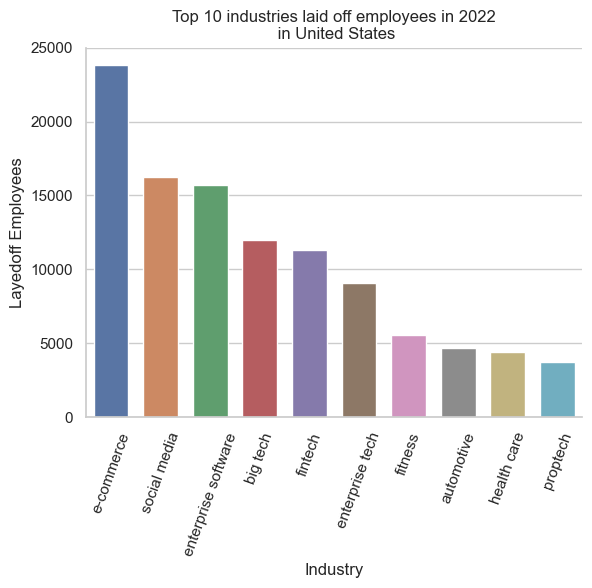

In [65]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="whitegrid",rc=custom_params)
sns.barplot(x='business',y='total_layoffs',data=top_business,width=0.7)
plt.title('Top 10 industries laid off employees in 2022\n in United States')
plt.xlabel('Industry')
plt.ylabel('Layedoff Employees')
plt.xticks(rotation=70)
plt.ylim(0,25000)
plt.show()